# Sales Analysis for the whole year

## Get the DS from exel

In [429]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime
pd.set_option('display.max_rows', 200)

### Read all the files and concatenete them to one DF
### Check if all the files are in

In [486]:
files=[f for f in os.listdir("./Sales_data")]

all_dfs=[pd.read_csv("./Sales_data/"+f) for f in files]
df=pd.concat(all_dfs)

In [487]:
sum([d.shape[0] for d in all_dfs])==df.shape[0]

True

### Save as a new csv file with info for the whole year. 

In [432]:
#df.to_csv("Year sales.csv",index=False)

In [433]:
sale_df=pd.read_csv("Year sales.csv")

In [434]:
sale_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Drop the missing values

In [435]:
sale_df.shape

(186850, 6)

In [436]:
sale_df=sale_df.dropna()

In [437]:
sale_df.shape

(186305, 6)

### Let's check if we have some wrong data types in columns where we must have only numeric values

In [438]:
sale_df[["Quantity Ordered","Price Each","Order Date","Order ID"]].head()

,Quantity Ordered,Price Each,Order Date,Order ID
0,2,11.95,04/19/19 08:46,176558
2,1,99.99,04/07/19 22:30,176559
3,1,600,04/12/19 14:38,176560
4,1,11.99,04/12/19 14:38,176560
5,1,11.99,04/30/19 09:27,176561


In [439]:
def dtype_check():
    for col in ["Quantity Ordered","Price Each","Order Date","Order ID"]:
        if sale_df[col].str.isalpha().any():
            print(f"Wrong alpha data types in {col}!!!")
        elif sale_df[col].str.istitle().any():
            print(f"Wrong title data types in {col}!!!")
        else:
            print(f"No wrong data types in {col}!")
dtype_check()

Wrong title data types in Quantity Ordered!!!
Wrong title data types in Price Each!!!
Wrong title data types in Order Date!!!
No wrong data types in Order ID!


### Lets check what titled data we have inside and drop it

In [440]:
sale_df[sale_df["Quantity Ordered"].str.istitle()==True]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [441]:
sale_df.drop(sale_df[sale_df["Quantity Ordered"].str.istitle()==True].index, inplace=True)

In [442]:
dtype_check()

No wrong data types in Quantity Ordered!
No wrong data types in Price Each!
No wrong data types in Order Date!
No wrong data types in Order ID!


### As I have seen in the graps later, there is data for the first January of 2020. Let's drop it to analyse only the 2019

In [443]:
sale_df.shape

(185950, 6)

In [444]:
sale_df.drop(sale_df[sale_df["Order Date"].str[6:8]=="20"].index, inplace=True)
sale_df.shape

(185916, 6)

In [445]:
sale_df[sale_df["Order Date"].str[6:8]=="20"].any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

# Now the data is clean and we can add new columns. First I will start with a total column.

In [446]:
sale_df["Total"]=sale_df["Quantity Ordered"].astype(int)*sale_df["Price Each"].astype(float)

In [447]:
sale_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99


# Add month column, by taking the month number from "Order date" column

In [448]:
month_nums=sale_df["Order Date"].str[:2].astype(int)
set(month_nums)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

### Getting month names to turn the month numbers into them

In [449]:
import calendar
month_names=list(calendar.month_name)

In [450]:
sale_df["Month"]=[month_names[i] for i in month_nums]

In [451]:
sale_df["Month"].unique()

array(['April', 'May', 'August', 'September', 'December', 'February',
       'March', 'January', 'July', 'June', 'November', 'October'],
      dtype=object)

# Adding state column
### The dict is taken from https://gist.github.com/rogerallen/1583593

In [452]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))


In [453]:
abbrev_to_us_state["TX"]

'Texas'

### Once again taking the required information with string slicing

In [454]:
state_abbr = [i[-8:-6] for i in sale_df["Purchase Address"]]

In [455]:
sale_df["State"] = [abbrev_to_us_state[i] for i in state_abbr]

In [456]:
sale_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total,Month,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,April,Texas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,April,Massachusetts
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,April,California
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,April,California
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,April,California


# Adding the category column

In [457]:
sale_df["Product"].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

### The number of product types is not that big, so we can easily split them in categories manually

In [458]:
all_cats={
"Cabel & batteries":['USB-C Charging Cable','Lightning Charging Cable','AA Batteries (4-pack)','AAA Batteries (4-pack)'],
"Headphones":['Bose SoundSport Headphones','Wired Headphones','Apple Airpods Headphones'],
"Phones":['Google Phone','iPhone','Vareebadd Phone'],
"Laptops":['Macbook Pro Laptop','ThinkPad Laptop'],
"Monitors":['27in 4K Gaming Monitor','Flatscreen TV','27in FHD Monitor', '20in Monitor','34in Ultrawide Monitor'],
"Household":['LG Dryer','LG Washing Machine']
}


In [459]:
sale_df["Category"]=[cat 
                    for product in list(sale_df["Product"]) 
                    for cat in list(all_cats.keys())  
                    if product in all_cats[cat]]

In [460]:
sale_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total,Month,State,Category
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,April,Texas,Cabel & batteries
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,April,Massachusetts,Headphones
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,April,California,Phones
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,April,California,Headphones
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,April,California,Headphones


# Saving the resulting data frame after reindexing the columns and changing the data type if required

In [461]:
new_df=sale_df.reindex(columns=["Order ID", 
                                "Product", "Category", "Quantity Ordered", "Price Each","Total",
                                "Order Date", "Month",
                                "Purchase Address","State"])
new_df.head()

,Order ID,Product,Category,Quantity Ordered,Price Each,Total,Order Date,Month,Purchase Address,State
0,176558,USB-C Charging Cable,Cabel & batteries,2,11.95,23.90,04/19/19 08:46,April,"917 1st St, Dallas, TX 75001",Texas
2,176559,Bose SoundSport Headphones,Headphones,1,99.99,99.99,04/07/19 22:30,April,"682 Chestnut St, Boston, MA 02215",Massachusetts
3,176560,Google Phone,Phones,1,600,600.00,04/12/19 14:38,April,"669 Spruce St, Los Angeles, CA 90001",California
4,176560,Wired Headphones,Headphones,1,11.99,11.99,04/12/19 14:38,April,"669 Spruce St, Los Angeles, CA 90001",California
5,176561,Wired Headphones,Headphones,1,11.99,11.99,04/30/19 09:27,April,"333 8th St, Los Angeles, CA 90001",California


In [462]:
new_df.dtypes


Order ID             object
Product              object
Category             object
Quantity Ordered     object
Price Each           object
Total               float64
Order Date           object
Month                object
Purchase Address     object
State                object
dtype: object

In [463]:
new_df["Order Date"] = pd.to_datetime(new_df["Order Date"]) 

In [464]:
new_df = new_df.astype({"Order ID":"int", 
                        "Quantity Ordered":"int", "Price Each":"float",
                        })

In [465]:
new_df.dtypes

Order ID                     int32
Product                     object
Category                    object
Quantity Ordered             int32
Price Each                 float64
Total                      float64
Order Date          datetime64[ns]
Month                       object
Purchase Address            object
State                       object
dtype: object

In [466]:
#new_df.to_csv("Final_sales.csv")

# Now the DF is finished and we can start to analyse and visualize it with mathplotlib. The visuals in mathplotlib are very basic and the more advanced visualization is available as power BI graphical report. It can be found in the folder as file or at this link:
# Analysing all sales per month

In [467]:
revenue=[int(new_df[new_df["Month"]==i]["Total"].sum()) for i in new_df["Month"].unique()]

revenue

[3390670,
 3152606,
 2244467,
 2097560,
 4613443,
 2202022,
 2807100,
 1813586,
 2647775,
 2577802,
 3199603,
 3736726]

In [468]:
revenue_to_month=dict(zip(new_df["Month"].unique(),revenue))

In [469]:
revenue_to_month

{'April': 3390670,
 'May': 3152606,
 'August': 2244467,
 'September': 2097560,
 'December': 4613443,
 'February': 2202022,
 'March': 2807100,
 'January': 1813586,
 'July': 2647775,
 'June': 2577802,
 'November': 3199603,
 'October': 3736726}

<function matplotlib.pyplot.show(close=None, block=None)>

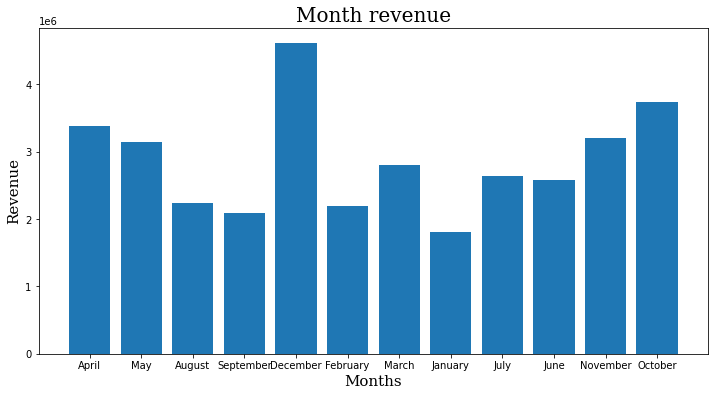

In [470]:
fig = plt.figure(figsize=(12,6))
font1={'family':'serif','size':20}
font2={'family':'serif','size':15}
plt.title('Month revenue',fontdict=font1)
plt.xlabel("Months",fontdict=font2)
plt.ylabel("Revenue",fontdict=font2)
plt.bar(range(len(new_df["Month"].unique())), revenue, tick_label=new_df["Month"].unique())
plt.savefig('Month_rev2.png',dpi=300,bbox_inches="tight")
plt.show

In [471]:
#A part of year sales for each month
percent_to_month=[ms/(sum(revenue)/100) for ms in revenue]

<function matplotlib.pyplot.show(close=None, block=None)>

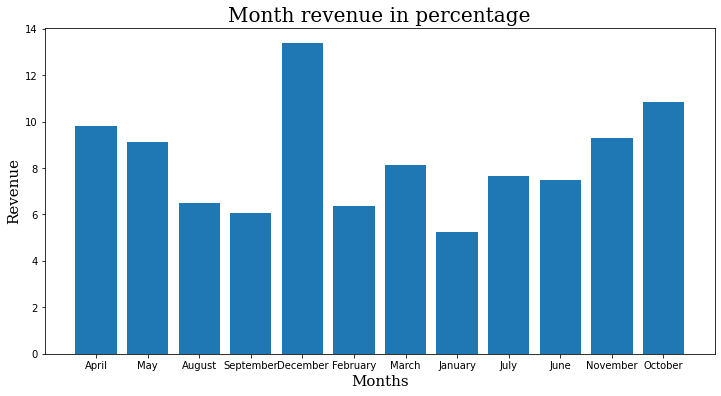

In [472]:
fig = plt.figure(figsize=(12,6))
plt.title('Month revenue in percentage',fontdict=font1)
plt.xlabel("Months",fontdict=font2)
plt.ylabel("Revenue",fontdict=font2)
plt.bar(range(len(new_df["Month"].unique())), percent_to_month, tick_label=new_df["Month"].unique())
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

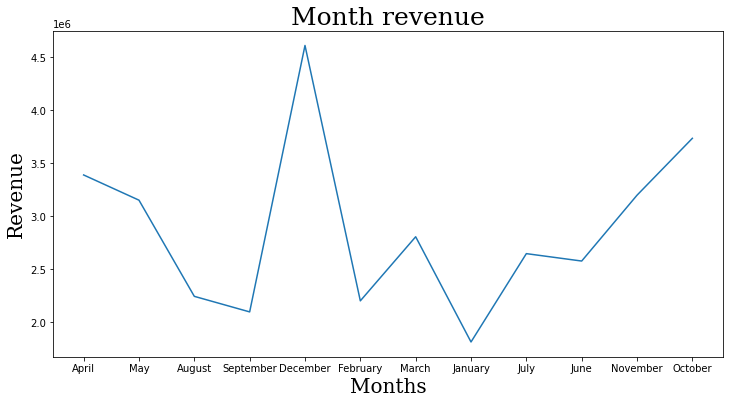

In [473]:
fig = plt.figure(figsize=(12,6))
font1={'family':'serif','size':25}
font2={'family':'serif','size':20}
plt.plot(new_df["Month"].unique(),revenue)
plt.title('Month revenue',fontdict=font1)
plt.xlabel("Months",fontdict=font2)
plt.ylabel("Revenue",fontdict=font2)
plt.show

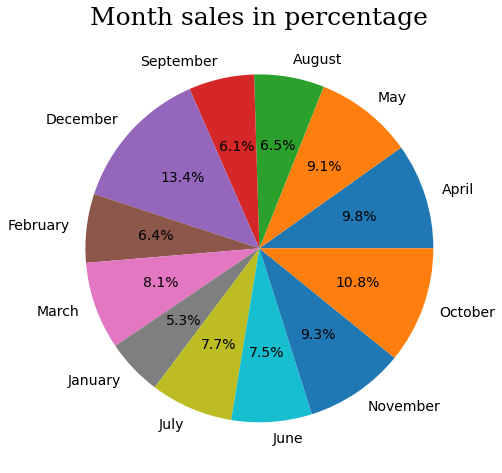

In [474]:
fig = plt.figure(figsize=(8,8))
plt.pie(percent_to_month, labels=new_df["Month"].unique(),autopct='%1.1f%%',textprops={'fontsize': 14})
plt.title('Month sales in percentage',fontdict=font1)
plt.show()

# Average bill

In [475]:
new_df.head()

,Order ID,Product,Category,Quantity Ordered,Price Each,Total,Order Date,Month,Purchase Address,State
0,176558,USB-C Charging Cable,Cabel & batteries,2,11.95,23.90,2019-04-19 08:46:00,April,"917 1st St, Dallas, TX 75001",Texas
2,176559,Bose SoundSport Headphones,Headphones,1,99.99,99.99,2019-04-07 22:30:00,April,"682 Chestnut St, Boston, MA 02215",Massachusetts
3,176560,Google Phone,Phones,1,600.00,600.00,2019-04-12 14:38:00,April,"669 Spruce St, Los Angeles, CA 90001",California
4,176560,Wired Headphones,Headphones,1,11.99,11.99,2019-04-12 14:38:00,April,"669 Spruce St, Los Angeles, CA 90001",California
5,176561,Wired Headphones,Headphones,1,11.99,11.99,2019-04-30 09:27:00,April,"333 8th St, Los Angeles, CA 90001",California


In [476]:
#average bill sum of a revenue divided by number of bills
average_bill=int(new_df["Total"].sum() / len(new_df["Order ID"].unique()))
print(f"The average bill is {average_bill} dollars!")

The average bill is 193 dollars!


# Analysing the sales by state

In [477]:
state_revenue=[ new_df[new_df["State"]==i]["Total"].sum()  for i in new_df["State"].unique()]
state_to_revenue=dict(zip(new_df["State"].unique(),state_revenue))

In [478]:
state_to_revenue

{'Texas': 4585342.22,
 'Massachusetts': 3660315.119999999,
 'California': 13711289.839999996,
 'Washington': 2747605.4899999993,
 'Georgia': 2795498.5799999996,
 'New York': 4662976.81,
 'Oregon': 1870579.3499999996,
 'Maine': 449758.26999999996}

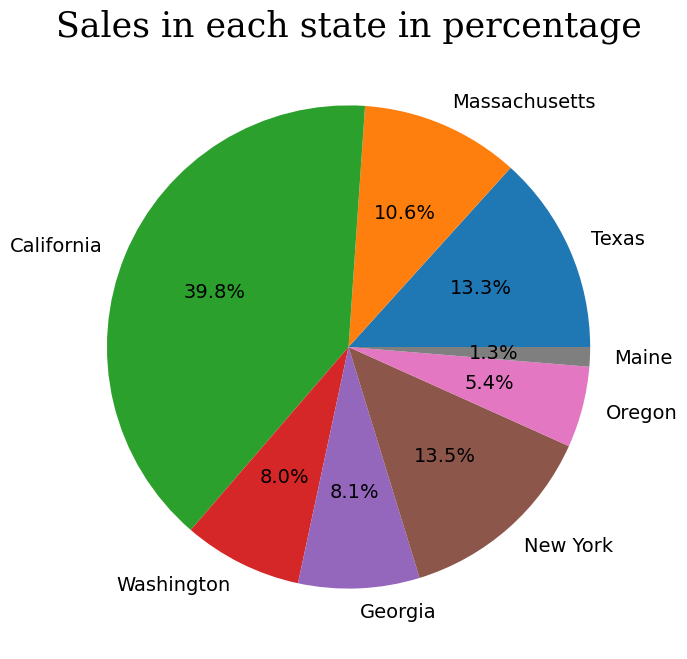

In [479]:
fig = plt.figure(figsize=(8,8),dpi=100)
plt.pie(state_revenue,labels=new_df["State"].unique(),autopct='%1.1f%%',textprops={'fontsize': 14})
plt.title('Sales in each state in percentage',fontdict=font1)
#plt.savefig('State_sales_perc.png',dpi=300,bbox_inches="tight")
plt.show()

# Analysis by category

In [480]:
revenue_to_cat=[new_df[new_df["Category"]==cat]["Total"].sum() for cat in all_cats.keys()]

In [481]:
revenue_to_cat

[832302.18,
 3940245.9300000006,
 8938300.0,
 12163858.72,
 7821458.849999997,
 787200.0]

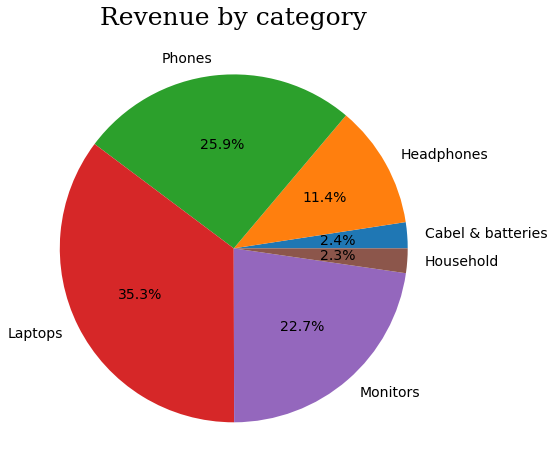

In [485]:
fig = plt.figure(figsize=(8,8))
plt.pie(revenue_to_cat, labels=all_cats.keys(), autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title('Revenue by category',fontdict=font1)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

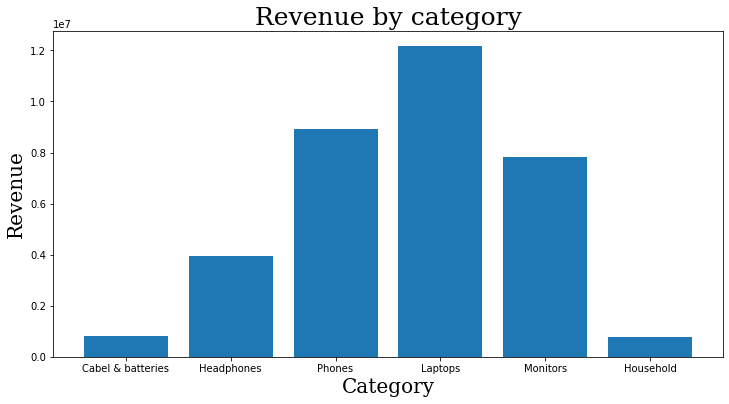

In [483]:
fig = plt.figure(figsize=(12,6))
plt.title('Revenue by category',fontdict=font1)
plt.xlabel("Category",fontdict=font2)
plt.ylabel("Revenue",fontdict=font2)
plt.bar(all_cats.keys(), revenue_to_cat)
plt.show